In [1]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [2]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        if (points[ind1],points[ind2]) not in segments and (points[ind2],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind2]))
        if (points[ind1],points[ind3]) not in segments and (points[ind3],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind3]))
        if (points[ind2],points[ind3]) not in segments and (points[ind3],points[ind2]) not in segments:
            segments.append((points[ind2],points[ind3]))
    return segments

Lista wierzchołków + Lista połączeń

In [3]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        if (i,ii) not in connections and (ii,i) not in connections:
            connections.append((i,ii))
        if (i,iii) not in connections and (iii,i) not in connections:
            connections.append((i,iii))
        if (ii,iii) not in connections and (iii,ii) not in connections:
            connections.append((ii,iii))
    return connections

In [4]:
p,t = triangulation_reader('2')
con = triangles_to_connections(t)
vertex_and_connections = (p,con)
print(vertex_and_connections)

([(1.0, 1.0), (2.0, 6.5), (9.0, 1.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0), (11.5, 12.0), (6.0, 12.0)], [(0, 2), (0, 1), (2, 1), (1, 7), (2, 7), (6, 7), (6, 2), (2, 3), (3, 6), (6, 4), (3, 4), (6, 5), (4, 5)])


Half Edge 

In [5]:
from halfedge import *
from visualizer import *

In [9]:
print(t)
print(p)
mesh = triangles_to_segments(p,t)
he = create_half_edge_structure(p, t)
print(len(he))
for h in he:
    print((h.vertex.cords, h.next.vertex.cords))

[(0, 2, 1), (1, 2, 7), (6, 7, 2), (2, 3, 6), (6, 3, 4), (6, 4, 5)]
[(1.0, 1.0), (2.0, 6.5), (9.0, 1.0), (17.5, 5.0), (19.0, 13.5), (12.0, 16.0), (11.5, 12.0), (6.0, 12.0)]
18
((1.0, 1.0), (9.0, 1.0), None)
((2.0, 6.5), (1.0, 1.0), None)
((2.0, 6.5), (9.0, 1.0), <halfedge.HalfEdge object at 0x7fd2a174da90>)
((9.0, 1.0), (2.0, 6.5), <halfedge.HalfEdge object at 0x7fd2a1785b20>)
((9.0, 1.0), (6.0, 12.0), <halfedge.HalfEdge object at 0x7fd2a1987d60>)
((9.0, 1.0), (11.5, 12.0), <halfedge.HalfEdge object at 0x7fd2a1711760>)
((9.0, 1.0), (17.5, 5.0), None)
((17.5, 5.0), (11.5, 12.0), <halfedge.HalfEdge object at 0x7fd2a1711c10>)
((17.5, 5.0), (19.0, 13.5), None)
((19.0, 13.5), (11.5, 12.0), <halfedge.HalfEdge object at 0x7fd2d8722520>)
((19.0, 13.5), (12.0, 16.0), None)
((12.0, 16.0), (11.5, 12.0), None)
((11.5, 12.0), (6.0, 12.0), None)
((11.5, 12.0), (9.0, 1.0), <halfedge.HalfEdge object at 0x7fd2a1987e80>)
((11.5, 12.0), (17.5, 5.0), <halfedge.HalfEdge object at 0x7fd2a1711610>)
((11.5, 12

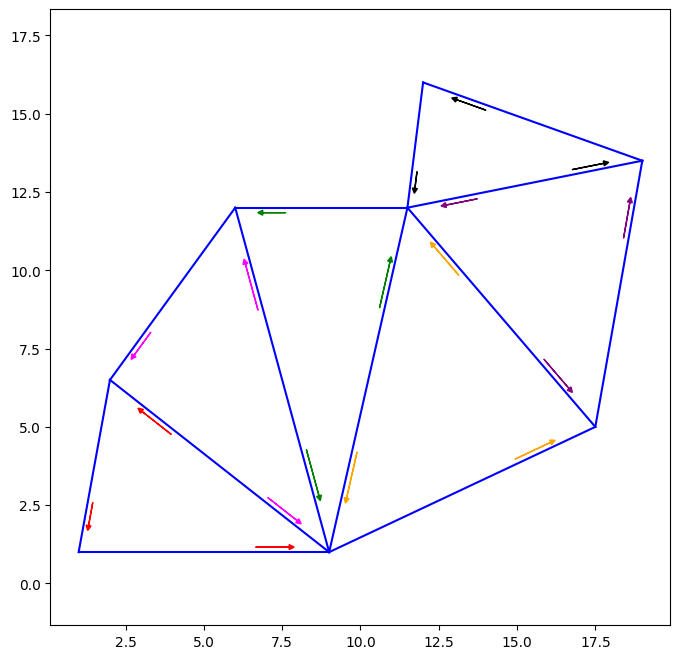

In [7]:
draw_halfedge_structure(he,mesh)

In [8]:
def apex_surroundings_basic(point, points, connections):
    surrounding = []
    for i,j in connections:
        if i == point:
            if j not in surrounding:
                surrounding.append(j)
            for a,b in connections:
                if a == j and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == j and a != point and a not in surrounding:
                    surrounding.append(a)
        elif j == point:
            if i not in surrounding:
                surrounding.append(i)
            for a,b in connections:
                if a == i and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == i and a != point and a not in surrounding:
                    surrounding.append(a)
    return surrounding

In [9]:
sur = apex_surroundings_basic(0, p, con)
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)

[2, 1, 7, 6, 3]
[(9.0, 1.0), (2.0, 6.5), (6.0, 12.0), (11.5, 12.0), (17.5, 5.0)]


In [51]:
import copy

def triangle_surroundings_basic(tri_id, triangles):
    triangle = triangles[tri_id]
    surrounding = []
    for i,(t1,t2,t3) in enumerate(triangles):
        if i != tri_id and (t1 in triangle or t2 in triangle or t3 in triangle):
            if i not in surrounding:
                surrounding.append(i)
    res = copy.copy(surrounding)
    for j in surrounding:
        temp_triangle = triangles[j]
        for k,(t1,t2,t3) in enumerate(triangles):
            if k != tri_id and (t1 in temp_triangle or t2 in temp_triangle or t3 in temp_triangle):
                if k not in res:
                    res.append(k)
    return surrounding, res

In [54]:
tri = triangle_surroundings_basic(0,t)
print(tri)

([1, 2, 4], [1, 2, 4, 3, 5, 6])


In [41]:
def apex_surroundings_halfedge(p,halfedges):
    surrounding = []
    hes = []
    for halfe in halfedges:
        if halfe.vertex.index == p:
            hes.append(halfe)
    if not hes:
        return surrounding
    for he in hes:
        he = he.next
        if he.vertex.index not in surrounding:
            while he:
                if he.vertex.index not in surrounding:
                    surrounding.append(he.vertex.index)
                he = he.next
                if he.vertex.index == p:
                    he = he.twin
    n = len(surrounding)
    for i in range(n):
        s = surrounding[i]
        hes = []
        for halfe in halfedges:
            if halfe.vertex.index == s:
                hes.append(halfe)
        if not hes:
            continue
        for he in hes:
            he = he.next
            if he.vertex.index not in surrounding:
                while he:
                    if he.vertex.index not in surrounding + [p]:
                        surrounding.append(he.vertex.index)
                    he = he.next
                    if he.vertex.index == s:
                        he = he.twin
                    
    return surrounding
    

In [44]:
sur = apex_surroundings_halfedge(4, he)
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)

[6, 3, 5, 7, 2]
[(11.5, 12.0), (17.5, 5.0), (12.0, 16.0), (6.0, 12.0), (9.0, 1.0)]
